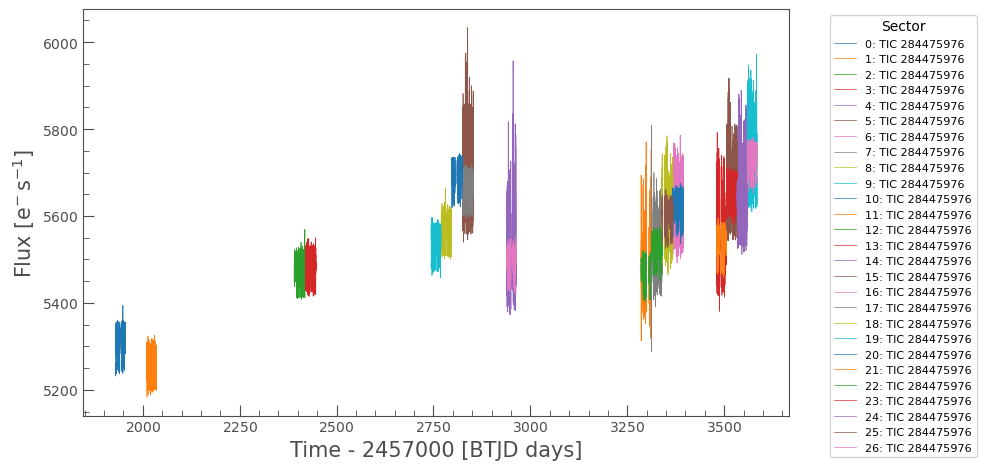

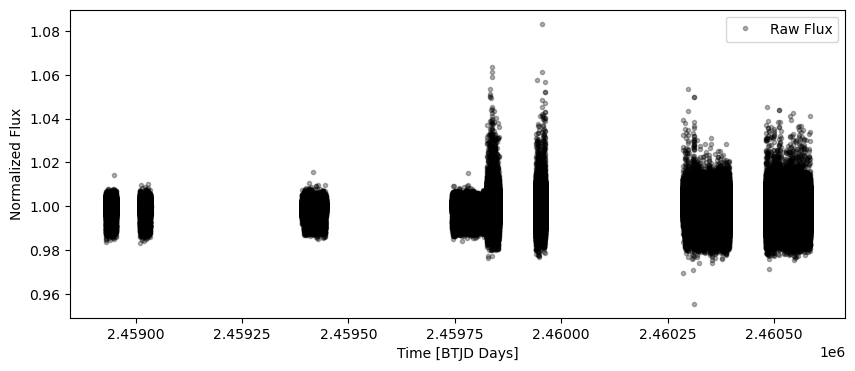

In [23]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from scipy.signal import savgol_filter
from astropy.stats import sigma_clip

# Download TESS data for the target star
TIC = "TIC 284475976"
sec = lk.search_lightcurve(TIC, author='SPOC')
data_all = sec.download_all()

# Plot all available sectors
data_all.plot()
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.gcf().set_size_inches(10, 5)  # Adjust figure size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()  
plt.show()

# Stitch all sectors together
norm_data = data_all.stitch()

# Convert Time and Flux to proper numerical values
time = norm_data.time.to_value('jd')  # Convert time to Julian Days
flux = norm_data.flux.filled(np.nan)  # Convert MaskedQuantity to array and fill NaNs

# Remove NaN or invalid values
mask = np.isfinite(time) & np.isfinite(flux)
time_clean = time[mask]
flux_clean = flux[mask]

# Plot cleaned light curve
plt.figure(figsize=(10, 4))
plt.plot(time_clean, flux_clean, 'k.', alpha=0.3, label='Raw Flux')
plt.xlabel("Time [BTJD Days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()





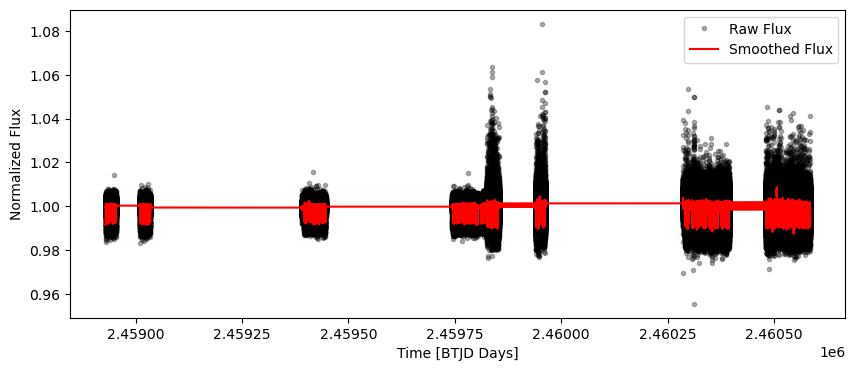

In [24]:
# Apply a median filter for noise reduction
smoothed_flux = median_filter(flux_clean, size=101)  # Adjust size for best results

# Plot smoothed light curve
plt.figure(figsize=(10, 4))
plt.plot(time_clean, flux_clean, 'k.', alpha=0.3, label='Raw Flux')
plt.plot(time_clean, smoothed_flux, 'r-', label='Smoothed Flux')
plt.xlabel("Time [BTJD Days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()




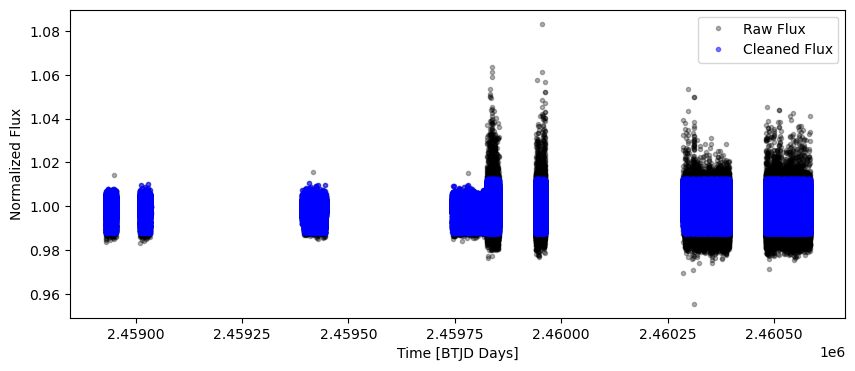

In [35]:
from astropy.stats import sigma_clip

# Apply sigma clipping
flux_clipped = sigma_clip(flux_clean, sigma=3, maxiters=5, masked=True)

# Create a mask to filter out clipped (masked) values
valid_mask = ~flux_clipped.mask  # True for valid (unclipped) values

# Apply the mask to both time and flux
time_clipped = time_clean[valid_mask]
flux_clipped = flux_clipped[valid_mask]  # Unmasked values only

# Plot the cleaned light curve
plt.figure(figsize=(10, 4))
plt.plot(time_clean, flux_clean, 'k.', alpha=0.3, label='Raw Flux')  # Original data
plt.plot(time_clipped, flux_clipped, 'b.', alpha=0.5, label='Cleaned Flux')  # Filtered data
plt.xlabel("Time [BTJD Days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()


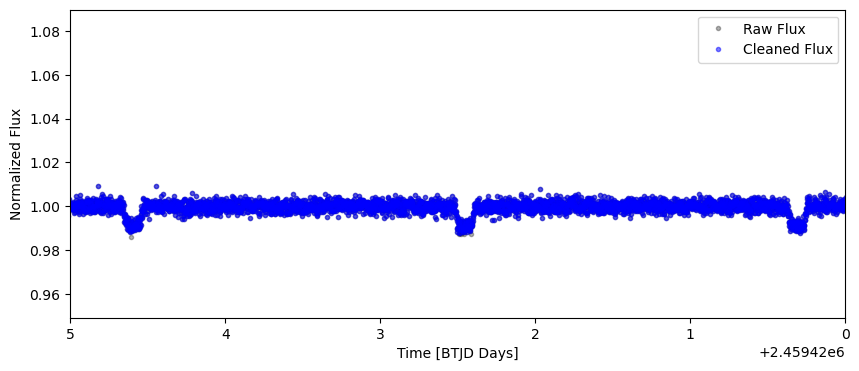

In [34]:
from astropy.stats import sigma_clip

# Apply sigma clipping
flux_clipped = sigma_clip(flux_clean, sigma=3, maxiters=5, masked=True)

# Create a mask to filter out clipped (masked) values
valid_mask = ~flux_clipped.mask  # True for valid (unclipped) values

# Apply the mask to both time and flux
time_clipped = time_clean[valid_mask]
flux_clipped = flux_clipped[valid_mask]  # Unmasked values only

# Plot the cleaned light curve
plt.figure(figsize=(10, 4))
plt.plot(time_clean, flux_clean, 'k.', alpha=0.3, label='Raw Flux')  # Original data
plt.plot(time_clipped, flux_clipped, 'b.', alpha=0.5, label='Cleaned Flux')  # Filtered data
plt.xlabel("Time [BTJD Days]")
plt.ylabel("Normalized Flux")
plt.xlim(2.459425e6, 2.459420e6)
plt.legend()
plt.show()


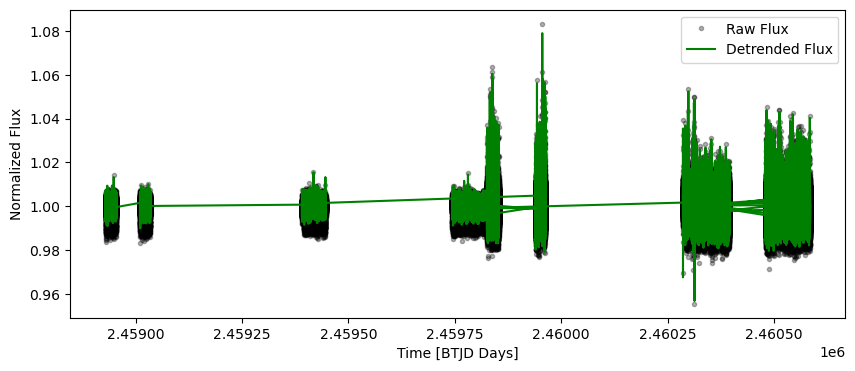

In [26]:
# Apply Savitzky-Golay filter for detrending
window_length = min(101, len(flux_clean) // 2 * 2 + 1)  # Ensure odd window length
detrended_flux = flux_clean / savgol_filter(flux_clean, window_length=window_length, polyorder=2)

# Plot detrended light curve
plt.figure(figsize=(10, 4))
plt.plot(time_clean, flux_clean, 'k.', alpha=0.3, label='Raw Flux')
plt.plot(time_clean, detrended_flux, 'g-', label='Detrended Flux')
plt.xlabel("Time [BTJD Days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

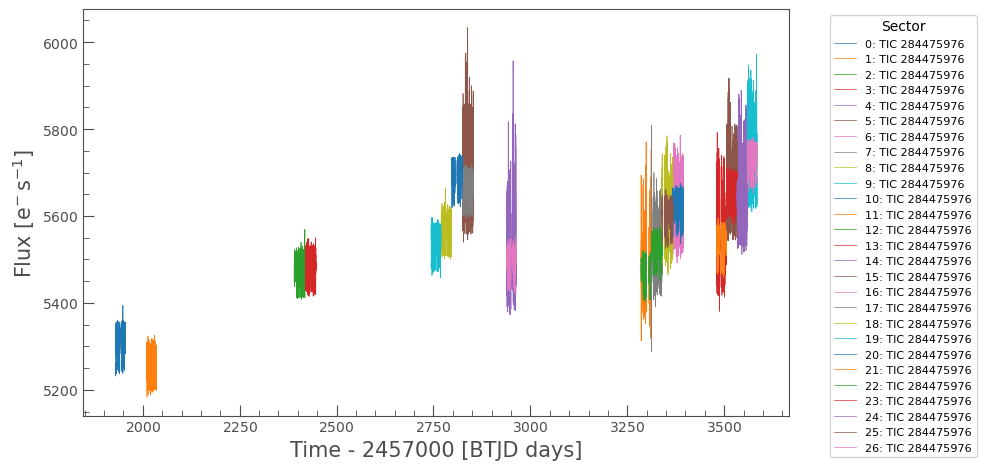

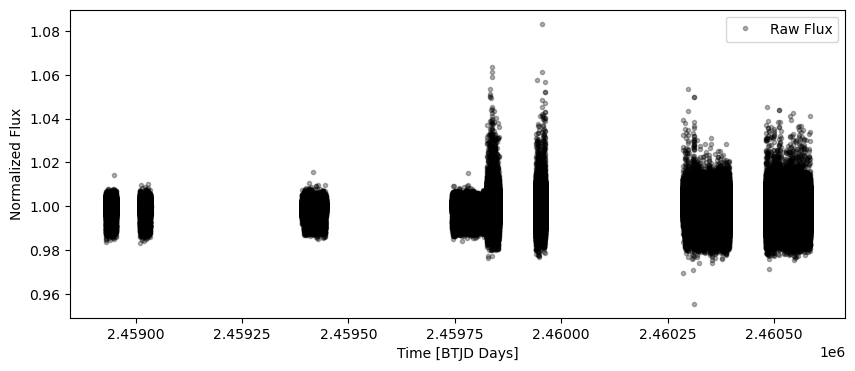

In [ ]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from scipy.signal import savgol_filter
from astropy.stats import sigma_clip

# Download TESS data for the target star
TIC = "TIC 284475976"
sec = lk.search_lightcurve(TIC, author='SPOC')
data_all = sec.download_all()

# Plot all available sectors
data_all.plot()
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.gcf().set_size_inches(10, 5)  # Adjust figure size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()  
plt.show()

# Stitch all sectors together
norm_data = data_all.stitch()

# Convert Time and Flux to proper numerical values
time = norm_data.time.to_value('jd')  # Convert time to Julian Days
flux = norm_data.flux.filled(np.nan)  # Convert MaskedQuantity to array and fill NaNs

# Remove NaN or invalid values
mask = np.isfinite(time) & np.isfinite(flux)
time_clean = time[mask]
flux_clean = flux[mask]

# Plot cleaned light curve
plt.figure(figsize=(10, 4))
plt.plot(time_clean, flux_clean, 'k.', alpha=0.3, label='Raw Flux')
plt.xlabel("Time [BTJD Days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()





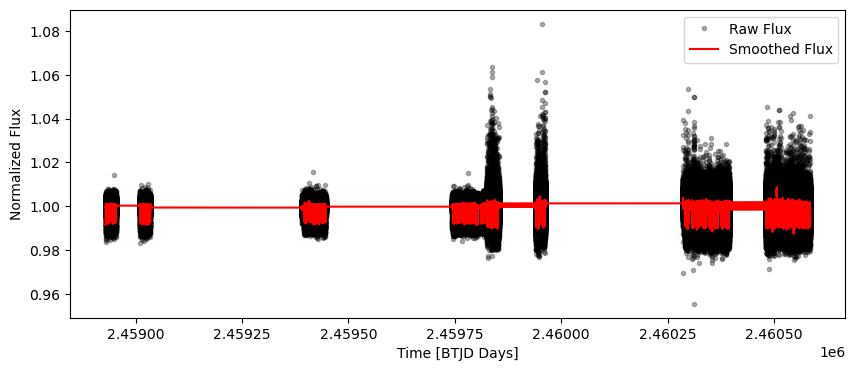

In [ ]:
# Apply a median filter for noise reduction
smoothed_flux = median_filter(flux_clean, size=101)  # Adjust size for best results

# Plot smoothed light curve
plt.figure(figsize=(10, 4))
plt.plot(time_clean, flux_clean, 'k.', alpha=0.3, label='Raw Flux')
plt.plot(time_clean, smoothed_flux, 'r-', label='Smoothed Flux')
plt.xlabel("Time [BTJD Days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()




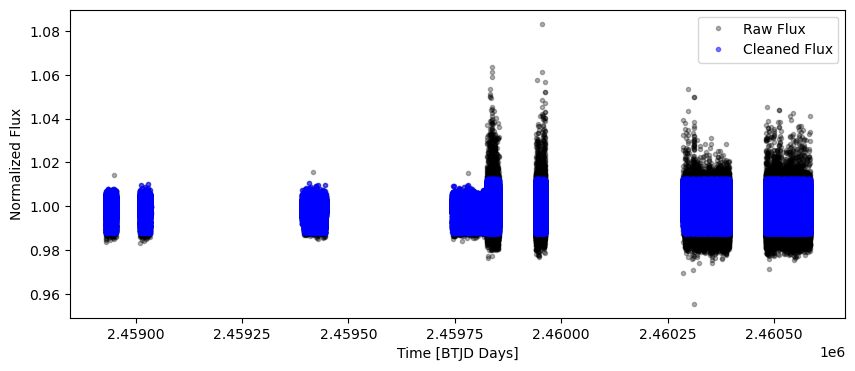

In [ ]:
from astropy.stats import sigma_clip

# Apply sigma clipping
flux_clipped = sigma_clip(flux_clean, sigma=3, maxiters=5, masked=True)

# Create a mask to filter out clipped (masked) values
valid_mask = ~flux_clipped.mask  # True for valid (unclipped) values

# Apply the mask to both time and flux
time_clipped = time_clean[valid_mask]
flux_clipped = flux_clipped[valid_mask]  # Unmasked values only

# Plot the cleaned light curve
plt.figure(figsize=(10, 4))
plt.plot(time_clean, flux_clean, 'k.', alpha=0.3, label='Raw Flux')  # Original data
plt.plot(time_clipped, flux_clipped, 'b.', alpha=0.5, label='Cleaned Flux')  # Filtered data
plt.xlabel("Time [BTJD Days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()


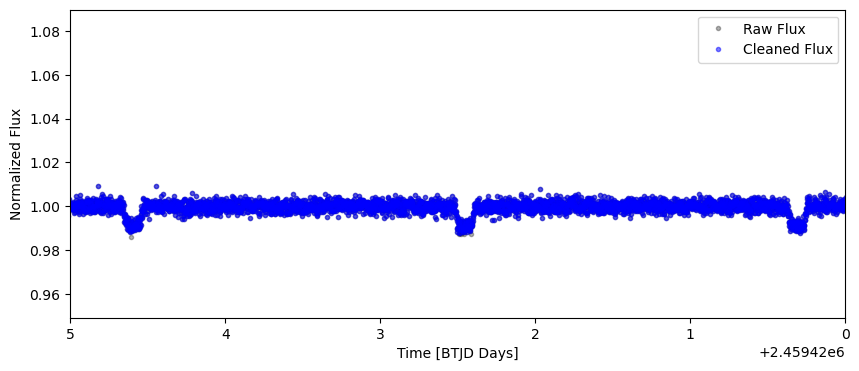

In [ ]:
from astropy.stats import sigma_clip

# Apply sigma clipping
flux_clipped = sigma_clip(flux_clean, sigma=3, maxiters=5, masked=True)

# Create a mask to filter out clipped (masked) values
valid_mask = ~flux_clipped.mask  # True for valid (unclipped) values

# Apply the mask to both time and flux
time_clipped = time_clean[valid_mask]
flux_clipped = flux_clipped[valid_mask]  # Unmasked values only

# Plot the cleaned light curve
plt.figure(figsize=(10, 4))
plt.plot(time_clean, flux_clean, 'k.', alpha=0.3, label='Raw Flux')  # Original data
plt.plot(time_clipped, flux_clipped, 'b.', alpha=0.5, label='Cleaned Flux')  # Filtered data
plt.xlabel("Time [BTJD Days]")
plt.ylabel("Normalized Flux")
plt.xlim(2.459425e6, 2.459420e6)
plt.legend()
plt.show()


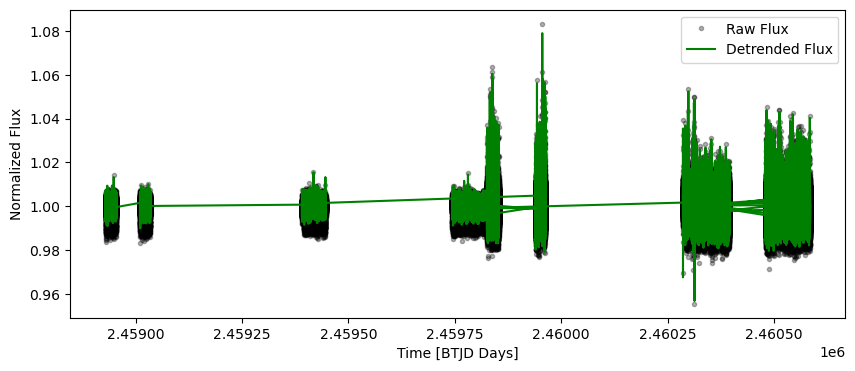

In [ ]:
# Apply Savitzky-Golay filter for detrending
window_length = min(101, len(flux_clean) // 2 * 2 + 1)  # Ensure odd window length
detrended_flux = flux_clean / savgol_filter(flux_clean, window_length=window_length, polyorder=2)

# Plot detrended light curve
plt.figure(figsize=(10, 4))
plt.plot(time_clean, flux_clean, 'k.', alpha=0.3, label='Raw Flux')
plt.plot(time_clean, detrended_flux, 'g-', label='Detrended Flux')
plt.xlabel("Time [BTJD Days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

In [36]:
trend = savgol_filter(flux_clean, window_length=71, polyorder=2)
detrended_flux = flux_clean / trend  # Normalize instead of subtracting


In [37]:
from lightkurve.periodogram import BoxLeastSquares

# Define period range for search (in days)
periods = np.linspace(0.5, 10, 1000)  # Search for periods between 0.5 to 10 days

# Perform BLS search
bls = BoxLeastSquares(time_clean, detrended_flux)
bls_power = bls.power(periods, duration=0.1, objective="snr")

# Identify best-fit period
best_period = periods[np.argmax(bls_power.power)]
print(f"Best-fit Period: {best_period:.4f} days")


ImportError: cannot import name 'BoxLeastSquares' from 'lightkurve.periodogram' (c:\Users\devka\anaconda3\envs\exoplanet_prj\lib\site-packages\lightkurve\periodogram.py)

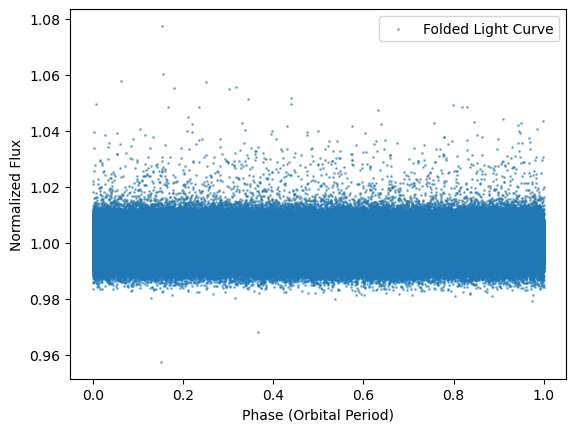

In [38]:
best_period=2.5
phase = (time_clean % best_period) / best_period
plt.scatter(phase, detrended_flux, s=1, alpha=0.5, label="Folded Light Curve")
plt.xlabel("Phase (Orbital Period)")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()


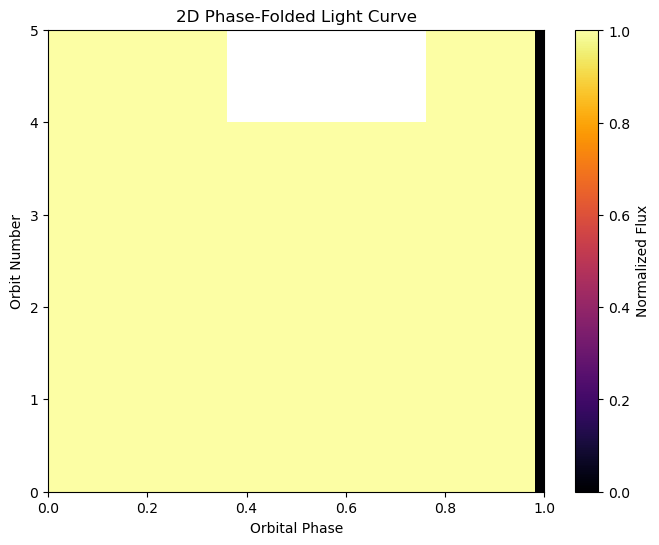

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Phase fold the light curve
phase = (time_clean % best_period) / best_period
sorted_indices = np.argsort(phase)  # Sort the data by phase
phase_sorted = phase[sorted_indices]
flux_sorted = detrended_flux[sorted_indices]

# Define 2D binning
num_bins = 50  # Number of bins in phase
num_orbits = 5  # Number of stacked orbits

# Create a 2D grid
phase_bins = np.linspace(0, 1, num_bins)
flux_2d = np.zeros((num_orbits, num_bins))

# Bin the data
for i in range(num_orbits):
    mask = (time_clean >= time_clean[0] + i * best_period) & (time_clean < time_clean[0] + (i + 1) * best_period)
    phase_orbit = phase[mask]
    flux_orbit = detrended_flux[mask]
    
    for j in range(num_bins - 1):
        bin_mask = (phase_orbit >= phase_bins[j]) & (phase_orbit < phase_bins[j + 1])
        flux_2d[i, j] = np.nanmedian(flux_orbit[bin_mask]) if np.any(bin_mask) else np.nan

# Plot the 2D phase-folded light curve
plt.figure(figsize=(8, 6))
plt.imshow(flux_2d, aspect='auto', cmap="inferno", origin='lower', extent=[0, 1, 0, num_orbits])
plt.colorbar(label="Normalized Flux")
plt.xlabel("Orbital Phase")
plt.ylabel("Orbit Number")
plt.title("2D Phase-Folded Light Curve")
plt.show()
